In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Sample data loading (assuming CSV format)
data = pd.read_csv('data.csv',delimiter=',', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])
# df1 = pd.read_csv('data.csv', delimiter=',', nrows = nRowsRead)



In [26]:
data.shape

(1600000, 6)

In [27]:
# Preprocess the text data
import re
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\S+", "", text)  # Remove mentions
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)  # Remove special characters
    text = text.lower().strip()
    return text

data['text'] = data['text'].apply(preprocess_text)



In [28]:
data

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww thats a bummer you shoulda got david car...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,i dived many times for the ball managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feel...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt interviews
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me fo...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tup...


In [29]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['target'].values



In [37]:
count_one, count_two,count_three,count_four,count_five = 0, 0,0,0,0
count_zero=0
for i in y:
    if i == 0:
        count_zero+=1
    if i == 1:
        count_one+=1
    if i == 2:
        count_two+=1
    if i == 3:
        count_three+=1
    if i == 4:
        count_four+=1
    if i==5:
        count_five+=1

print("ZEROS: ", count_zero)
print("ONES: ", count_one)
print("TWO: ", count_two)
print("THREE: ", count_three)
print("FOUR: ", count_four)
print("FIVE: ", count_five)



ZEROS:  800000
ONES:  0
TWO:  0
THREE:  0
FOUR:  800000
FIVE:  0


In [38]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# GBM Model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=True)
gbm.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.3776           11.45m
         2           1.3705           11.26m
         3           1.3646           11.25m
         4           1.3589           11.65m
         5           1.3539           12.17m
         6           1.3490           12.63m
         7           1.3446           12.72m
         8           1.3408           12.82m
         9           1.3368           12.80m
        10           1.3328           12.75m
        20           1.2987           11.69m
        30           1.2742           10.12m
        40           1.2552            8.71m
        50           1.2397            7.28m
        60           1.2258            5.85m
        70           1.2143            4.39m
        80           1.2033            2.91m
        90           1.1943            1.46m
       100           1.1859            0.00s


GradientBoostingClassifier(random_state=42, verbose=True)

In [51]:
# AdaBoost Model
base_estimator = DecisionTreeClassifier(max_depth=2)  # Ensure homogeneous base models
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)


c:\Users\hamza.qureshi\AppData\Local\anaconda3\envs\generalEnv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=100, random_state=42)

GBM Accuracy:  0.705340625
AdaBoost Accuracy:  0.689678125


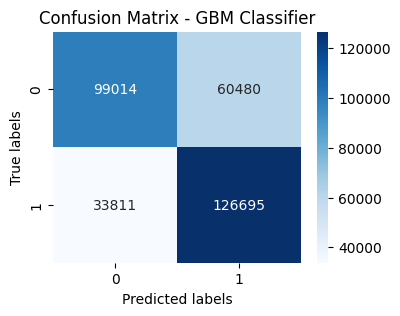

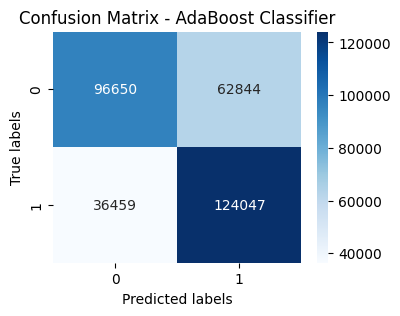

In [58]:
# Predictions
gbm_preds = gbm.predict(X_test)
adaboost_preds = adaboost.predict(X_test)

# Accuracy
gbm_accuracy = accuracy_score(y_test, gbm_preds)
adaboost_accuracy = accuracy_score(y_test, adaboost_preds)

print("GBM Accuracy: ", gbm_accuracy)
print("AdaBoost Accuracy: ", adaboost_accuracy)

# Plot confusion matrix for AdaBoost
plot_confusion_matrix(y_test, gbm_preds, title="Confusion Matrix - GBM Classifier")
# Plot confusion matrix for AdaBoost
plot_confusion_matrix(y_test, adaboost_preds, title="Confusion Matrix - AdaBoost Classifier")


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

